# HW2
Author: Zhao Jin

## 1 Feedforward: Building a ReLU Neural Network

### 1.1 
Draw a network with:

• 2 inputs

• 1 hidden layers with 3 hidden units and a 

• 1-class output (for binary classification)

![ezgif.com-crop.png](https://i.loli.net/2019/10/18/kxDdVMG5wyhg3mi.png)

### 1.2 
Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

$$ Output = ReLU(v_1*h_1+v_2*h_2+v_3*h_3+b_i) $$

$$ h_i = ReLU(w_{1i}*x_1+w_{2i}*x_2+b) $$

Note:

$x_i$ stands for the $i^{th}$ input

$h_i$ stands for the output for the $i^{th}$ unit of hidden layer

$w_{ij}$ stands for the weight from $x_i$ to $h_j$

$v_i$ stands for the weight from $h_i$ to the output unit

$b_i$ stands for the bias for the $i^{th}$ unit in hidden layer

$b$ stands for the bias for the output

### 1.3 
Write out the forward-pass function in python, call it ff nn ReLu(...)

In [126]:
import numpy as np
import math
def ReLU(x):
    return np.maximum(0,x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ff_nn__ReLu(x,w,v,b_1,b):
    
    a = np.dot(x,w) + b_1
    h = ReLU(a)
    y = np.dot(h,v) + b
    output = sigmoid(y)

    return np.array(output)

### 1.4 
get the class probabilities associated with the forward pass of each sample given

In [127]:
x = np.array([1,-1,0,-1,0,1]).reshape(3,2)
w = np.array([1,-1,0,0,0,0.5]).reshape(2,3)
v = np.array([1,0,-1]).reshape(3,1)
b_1 = np.array([0,0,1]).reshape(1,3)
b = np.array([1])
result = ff_nn__ReLu(x,w,v,b_1,b)
result

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

## 2 Gradient Descent
Consider a simple non-convex function of two variables:
$$ f(x,y)=(1−x^3)+100∗(y^2 −x)^2 $$

### 2.1 
What are the partial derivatives of f with respect to x and to y?

 $\frac{\partial f}{\partial x} = -3x^3+100*2(y^2-x)*(-1) = -3x^2-200(y^2-x)$

 $\frac{\partial f}{\partial y} = 100*2(y^2-x)*2*y=400y(y^2-x)$

### 2.2 
Create a visualization of the contours of the Rosenbrock function.
$$ (1-x)^2+100(y-x^2)^2 $$

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

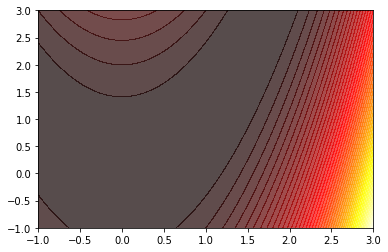

In [129]:
def F(x,y):
    return np.square(1-x)+100*np.square(y-x*x)

n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,F(X,Y),50,alpha=0.7,cmap = plt.cm.hot)

([], <a list of 0 Text yticklabel objects>)

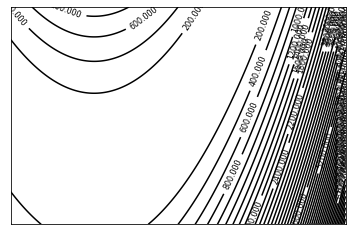

In [130]:
C = plt.contour(X, Y, F(X, Y), 50, colors='black')
plt.clabel(C, inline=True, fontsize=8)
plt.xticks(())
plt.yticks(())

### 2.3 
Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [131]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
def f(X):
    return np.square(1-X[0])+100*np.square(X[1]-X[0]*X[0])
def grad_f(X):
    return np.array([-2*(1-X[0]) - 400*(X[1]-np.square(X[0]))*X[0],
                     200*(X[1]-np.square(X[0]))])

In [133]:
def grad_descent(X, learning_rate, iteration):
    z = f(X)
    count = 0
    history = [X]
    while count < iteration:
        new_X = X - learning_rate*grad_f(X)
        new_z = f(new_X)
        X = new_X
        z = new_z
        history.append(new_X)
        count+=1
    return history

#### Learning rate: 0.00001

Text(0.4685, 0.2168, 'learning rate = 1e-05, minima at (0.4685, 0.2168)')

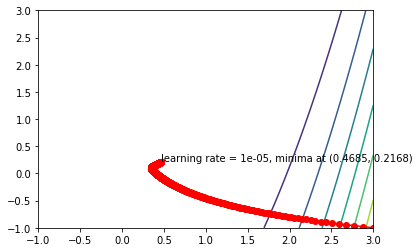

In [134]:
x = np.array([3,-1])
learning_rate = 0.00001
iteration = 20000
history = grad_descent(x,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

#### Learning rate: 0.0001

Text(0.8392, 0.7035, 'learning rate = 0.0001, minima at (0.8392, 0.7035)')

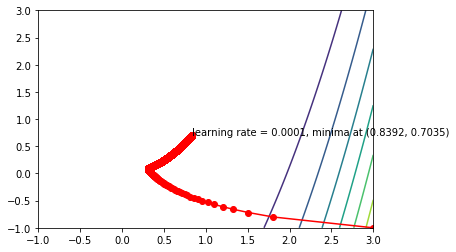

In [135]:
x = np.array([3,-1])
learning_rate = 0.0001
iteration = 20000
history = grad_descent(x,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

#### Learning rate: 0.0003

Text(0.9699, 0.9405, 'learning rate = 0.0003, minima at (0.9699, 0.9405)')

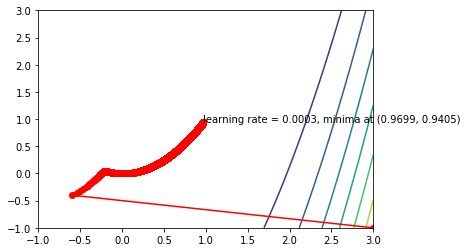

In [136]:
x = np.array([3,-1])
learning_rate = 0.0003
history = grad_descent(x,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

#### Learning rate: 0.0005
The result here is very close to the real minimum.

Text(0.9951, 0.9901, 'learning rate = 0.0005, minima at (0.9951, 0.9901)')

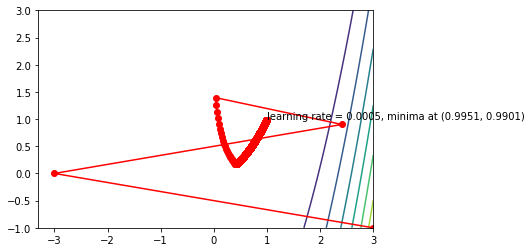

In [137]:
x = np.array([3,-1])
learning_rate = 0.0005
iteration = 20000
history = grad_descent(x,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

### 2.4
Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [138]:
def grad_descent_with_momentum(X, alpha, learning_rate, iteration):
    z = f(X)
    count = 0
    history = [X]
    v = np.zeros(X.size)
    while count < iteration:
        v = alpha*v + learning_rate*grad_f(X)
        new_X = X - v
        new_z = f(new_X)
        X = new_X
        z = new_z
        history.append(new_X)
        count+=1
    return history

Text(1.0022, 1.0045, 'learning rate = 0.0005,alpha = 0.3, minima at (1.0022, 1.0045)')

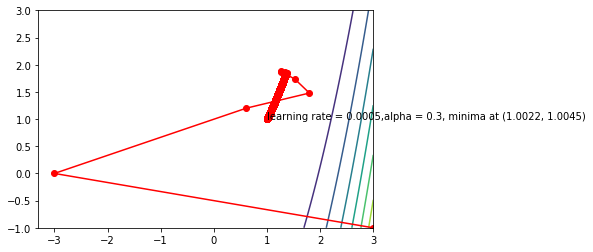

In [139]:
x = np.array([3,-1])
learning_rate = 0.0005
iteration = 20000
alpha = 0.3
history = grad_descent_with_momentum(x,alpha,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) +",alpha = "+str(alpha) +", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

## Backprop

### 3.1 
For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$$ Loss = -y_ilog(\hat{y})-(1-y_i)log(1-\hat{y})$$
$$ output = Sigmoid(y)$$
$$ y = v_1*out_1 + v_2*out_2 + v_3*out_3 + b$$
$$ out_j = ReLU(in_j) , 1<=j<=3 $$
$$ in_j = w_{1j}*x_1 + w_{2j}*x_2 +b_j , 1<=j<=3 $$

$ \frac{\partial Loss}{\partial v_i} = \frac{\partial Loss}{\partial output}\frac{\partial output}{\partial y} \frac{\partial y}{\partial v_i} = -(\frac{output}{\hat{output}}-\frac{1-output}{1-\hat{output}})* sigmoid(y)(1-sigmoid(y))* out_i $

$ \frac{\partial Loss}{\partial b} =\frac{\partial Loss}{\partial output}\frac{\partial output}{\partial y}\frac{\partial y}{\partial b} =-(\frac{output}{\hat{output}}-\frac{1-output}{1-\hat{output}})* sigmoid(y)(1-sigmoid(y))  $

$ \frac{\partial Loss}{\partial b_i} =\frac{\partial Loss}{\partial output}\frac{\partial output}{\partial y}\frac{\partial y}{\partial out_j}\frac{\partial out_j}{\partial in_j}\frac{\partial in_j}{\partial b_i} = -(\frac{output}{\hat{output}}-\frac{1-output}{1-\hat{output}})* sigmoid(y)(1-sigmoid(y))* v_j* w_i (if in_j>0)$

$ \frac{\partial Loss}{\partial b_i} = 0 (if in_j<0)$

$ \frac{\partial Loss}{\partial w_{ij}} =\frac{\partial Loss}{\partial output}\frac{\partial output}{\partial y}\frac{\partial y}{\partial out_j}\frac{\partial out_j}{\partial in_j}\frac{\partial in_j}{\partial w_{ij}} = -(\frac{output}{\hat{output}}-\frac{1-output}{1-\hat{output}})* sigmoid(y)(1-sigmoid(y))* v_j *x_i (if in_j>0)$

$\frac{\partial Loss}{\partial w_{ij}} = 0 (if in_j<0) $


### 3.2
Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

dw = [dw11,dw12,dw13,dw21,dw22,dw23]

dv = [dv1,dv2,dv3]

db = [db1,db2,db3]

dc

In [140]:
def loss(y,yhat):
    tot = -y * np.log(yhat) - (1-y)*np.log(1-yhat)
    return  tot.sum()

def d_loss(y,yhat):
    return -(y/yhat - (1-y)/(1-yhat))

def d_relu(x):
    return np.where(x>0, 1, 0)

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def ff_forward(X,W,b,V,c):
    hin = X.dot(W)+b
    hout = ReLU(hin)
    
    yhat = hout.dot(V)+c
    output = sigmoid(yhat)
    
    return [hin,hout,yhat,output]
def grad_f(X,W,b,V,c,gt):
    hin,hout,yhat,output = ff_forward(X,W,b,V,c)
    
    dc = d_loss(gt,output)*d_sigmoid(yhat)
    dv = d_loss(gt,output)*d_sigmoid(yhat) * hout.T
    db = d_loss(gt,output)*d_sigmoid(yhat) * V.T * (hin > 0)
    dw = X.T.dot( d_loss(gt,output)*d_sigmoid(yhat) * V.T * (hin > 0))
    
    return [dw,db,dv,dc]

### 3.3
Generate a synthetic dataset like the XOR pattern (see below).

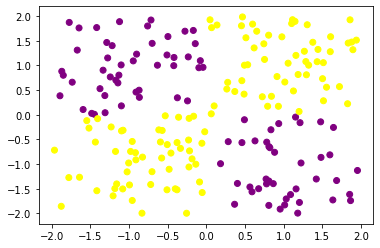

In [141]:
n= 200
x = np.random.uniform(-2,2,2*n).reshape(n,2)

col =['yellow']*n
for i in range(0,n):
    if x[i][0]*x[i][1]<0:
        col[i] = 'purple'

plt.scatter(x[:,0],x[:,1],color=col )

### 3.4 
Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [142]:
y = np.zeros(n)
for i in range(0,n):
    if col[i]=='yellow':
        y[i]=1
        
W = np.random.randn(6*n).reshape((n,2,3))
b = np.random.randn(3*n).reshape((n,1,3))
V = np.random.randn(3*n).reshape((n,3,1))
c= np.random.randn(1*n)
x = x.reshape((n,1,2))
y = y.reshape((n,1))

In [143]:
def grad_descent(x, y, W, b, V, c, iterations, learning_rate):
    losses = []
    
    for i in range(iterations):
        total_loss = 0
        
        for j in range(len(y)):
            hin,hout,yhat,output = ff_forward(x[j],W[j],b[j],V[j],c[j])
            dw,db,dv,dc = grad_f(x[j],W[j],b[j],V[j],c[j],y[j])
            W[j] = W[j] - learning_rate*dw
            b[j] = b[j] - learning_rate*db
            V[j] = V[j] - learning_rate*dv
            c[j] = c[j] - learning_rate*dc
            loss_j = loss(y[j],output)
            total_loss+=loss_j
        
        print("loss for iter {}".format(i) + " {}".format(total_loss))
        
        losses.append(total_loss)
    return losses

In [144]:
iterations = 1000
learning_rate = 0.01
losses = grad_descent(x, y, W, b, V, c,iterations,learning_rate)

loss for iter 0 304.984575409254
loss for iter 1 291.7474029205942
loss for iter 2 279.1156551492089
loss for iter 3 267.08120155136015
loss for iter 4 255.62801249985694
loss for iter 5 244.68522841621257
loss for iter 6 234.24278466063524
loss for iter 7 224.3110952899279
loss for iter 8 214.97357696343016
loss for iter 9 206.21128846042728
loss for iter 10 198.02812584996784
loss for iter 11 190.3149103565315
loss for iter 12 183.00159983459025
loss for iter 13 176.11448419239179
loss for iter 14 169.7811028512407
loss for iter 15 163.8187539458992
loss for iter 16 158.21044407641386
loss for iter 17 152.96059932829965
loss for iter 18 148.0619778134942
loss for iter 19 143.48892000979728
loss for iter 20 139.2433836999487
loss for iter 21 135.26292336777337
loss for iter 22 131.5259080304851
loss for iter 23 128.00023145796135
loss for iter 24 124.68157680412385
loss for iter 25 121.5478864688314
loss for iter 26 118.58799486310068
loss for iter 27 115.7920781832796
loss for iter 2

loss for iter 234 25.686178402838628
loss for iter 235 25.58889735327362
loss for iter 236 25.492287275293698
loss for iter 237 25.396341529418955
loss for iter 238 25.301053547379595
loss for iter 239 25.206416831430126
loss for iter 240 25.11242495370867
loss for iter 241 25.01907155563685
loss for iter 242 24.926350347355044
loss for iter 243 24.834255107189513
loss for iter 244 24.742779681146224
loss for iter 245 24.651917982428138
loss for iter 246 24.561663990972278
loss for iter 247 24.47201175300253
loss for iter 248 24.382955380596165
loss for iter 249 24.294489051259877
loss for iter 250 24.20661956877686
loss for iter 251 24.119329283121726
loss for iter 252 24.032723304282733
loss for iter 253 23.946737693752958
loss for iter 254 23.861312587773163
loss for iter 255 23.776442566859767
loss for iter 256 23.692122273773442
loss for iter 257 23.6083464131054
loss for iter 258 23.525109750857254
loss for iter 259 23.442407114014006
loss for iter 260 23.360233390109233
loss for

loss for iter 465 13.329739900432905
loss for iter 466 13.300701832261879
loss for iter 467 13.271781626068115
loss for iter 468 13.242978611242497
loss for iter 469 13.214292121951935
loss for iter 470 13.185721497097731
loss for iter 471 13.157266080274061
loss for iter 472 13.128925219727133
loss for iter 473 13.100698268314751
loss for iter 474 13.072584583466284
loss for iter 475 13.044583527143127
loss for iter 476 13.016694465799546
loss for iter 477 12.988916770344032
loss for iter 478 12.961249816101004
loss for iter 479 12.933692982772973
loss for iter 480 12.906245654403037
loss for iter 481 12.87890721933796
loss for iter 482 12.851677070191426
loss for iter 483 12.824554603807837
loss for iter 484 12.797539221226508
loss for iter 485 12.770630327646115
loss for iter 486 12.743827332389674
loss for iter 487 12.717129648869793
loss for iter 488 12.690536694554309
loss for iter 489 12.664047890932322
loss for iter 490 12.637662663480603
loss for iter 491 12.611380441630276
lo

loss for iter 690 8.869188540895117
loss for iter 691 8.855784414527102
loss for iter 692 8.84241910614875
loss for iter 693 8.829092450878427
loss for iter 694 8.815804284740144
loss for iter 695 8.802554444657583
loss for iter 696 8.789342768448247
loss for iter 697 8.776169094817606
loss for iter 698 8.76303326335334
loss for iter 699 8.749935114519516
loss for iter 700 8.736874489650972
loss for iter 701 8.72385123094759
loss for iter 702 8.71086518146868
loss for iter 703 8.697916185127376
loss for iter 704 8.68500408668517
loss for iter 705 8.672128731746332
loss for iter 706 8.65928996675248
loss for iter 707 8.646487638977133
loss for iter 708 8.633721596520365
loss for iter 709 8.620991688303443
loss for iter 710 8.608297764063508
loss for iter 711 8.595639674348337
loss for iter 712 8.583017270511082
loss for iter 713 8.570430404705135
loss for iter 714 8.557878929878882
loss for iter 715 8.545362699770685
loss for iter 716 8.532881568903758
loss for iter 717 8.52043539258112

loss for iter 925 6.520813568985909
loss for iter 926 6.513390913044401
loss for iter 927 6.505984469032314
loss for iter 928 6.4985941845727355
loss for iter 929 6.491220007512821
loss for iter 930 6.4838618859226544
loss for iter 931 6.476519768094038
loss for iter 932 6.469193602539355
loss for iter 933 6.461883337990392
loss for iter 934 6.454588923397168
loss for iter 935 6.447310307926823
loss for iter 936 6.4400474409624024
loss for iter 937 6.432800272101819
loss for iter 938 6.4255687511566535
loss for iter 939 6.418352828151041
loss for iter 940 6.411152453320589
loss for iter 941 6.403967577111245
loss for iter 942 6.396798150178203
loss for iter 943 6.389644123384787
loss for iter 944 6.382505447801411
loss for iter 945 6.3753820747044605
loss for iter 946 6.368273955575229
loss for iter 947 6.361181042098847
loss for iter 948 6.35410328616324
loss for iter 949 6.347040639858042
loss for iter 950 6.339993055473571
loss for iter 951 6.332960485499782
loss for iter 952 6.3259

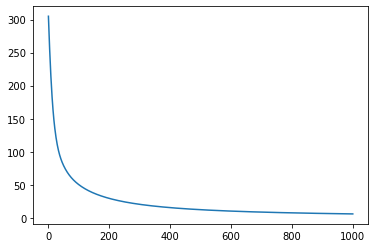

In [145]:
plt.plot(np.arange(1,iterations+1),losses)

### 3.5
Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.


In [146]:
W = np.random.randn(6*n).reshape((n,2,3))
b = np.random.randn(3*n).reshape((n,1,3))
V = np.random.randn(3*n).reshape((n,3,1))
c= np.random.randn(1*n)


def grad_descent_with_momentum(x, y, W, b, V, c, iterations, learning_rate,alpha):
    losses = []
    vw = np.zeros(6*n).reshape((n,2,3))
    vb = np.zeros(3*n).reshape((n,1,3))
    vv = np.zeros(3*n).reshape((n,3,1))
    vc= np.zeros(1*n)
    yhats = []
    for i in range(iterations):
        total_loss = 0
        for j in range(len(y)):
            hin,hout,yhat,output = ff_forward(x[j],W[j],b[j],V[j],c[j])
            dw,db,dv,dc = grad_f(x[j],W[j],b[j],V[j],c[j],y[j])
            vw[j] = alpha * vw[j] - learning_rate*dw
            vb[j] = alpha * vb[j] - learning_rate*db
            vv[j] = alpha * vv[j] - learning_rate*dv
            vc[j] = alpha * vc[j] - learning_rate*dc
            
            W[j] = W[j] + vw[j]
            b[j] = b[j] + vb[j]
            V[j] = V[j] + vv[j]
            c[j] = c[j] + vc[j]

            loss_j = loss(y[j],output)
            total_loss+=loss_j
            if i == iterations-1:
                yhats.append(output)
            
        
        print("loss for iter{}".format(i) + " {}".format(total_loss))
        
        losses.append(total_loss)
    return [yhats,losses]

In [147]:
iterations = 1000
learning_rate = 0.01
alpha = 0.5
yhats,losses_with_momentum = grad_descent_with_momentum(x, y, W, b, V, c,iterations,learning_rate,alpha)

loss for iter0 239.4544025766441
loss for iter1 229.8162443377288
loss for iter2 216.02099826560143
loss for iter3 201.07284858711063
loss for iter4 186.6053450797283
loss for iter5 173.4921101986386
loss for iter6 162.21000382548596
loss for iter7 152.43977605468842
loss for iter8 143.91537948040684
loss for iter9 136.40434326810302
loss for iter10 129.74672306026102
loss for iter11 123.81419795369611
loss for iter12 118.6830846699519
loss for iter13 114.07414022108341
loss for iter14 109.8379416376275
loss for iter15 106.02294202406138
loss for iter16 102.57032813970595
loss for iter17 99.38557676332503
loss for iter18 96.47184450994114
loss for iter19 93.7912709482929
loss for iter20 91.31294003393958
loss for iter21 89.01712061701741
loss for iter22 86.87720673249603
loss for iter23 84.88141921025516
loss for iter24 83.04012488632681
loss for iter25 81.30471184251904
loss for iter26 79.66597764424161
loss for iter27 78.10757219161334
loss for iter28 76.62172289886247
loss for iter2

loss for iter236 15.496307575563337
loss for iter237 15.430389534266617
loss for iter238 15.364983080513731
loss for iter239 15.300082654456364
loss for iter240 15.235682770613394
loss for iter241 15.171778016716587
loss for iter242 15.108363052580303
loss for iter243 15.045432608993512
loss for iter244 14.982981486633205
loss for iter245 14.92100455499847
loss for iter246 14.859496751364327
loss for iter247 14.798453079755014
loss for iter248 14.737868609935896
loss for iter249 14.67773847642365
loss for iter250 14.618057877514014
loss for iter251 14.558822074326985
loss for iter252 14.500026389868545
loss for iter253 14.441666208108868
loss for iter254 14.383736973076402
loss for iter255 14.326234187967435
loss for iter256 14.26915341427079
loss for iter257 14.212490270907427
loss for iter258 14.156240433384163
loss for iter259 14.10039963296174
loss for iter260 14.044963655836536
loss for iter261 13.989928342335675
loss for iter262 13.935289586125307
loss for iter263 13.881043333431

loss for iter470 7.529269543414786
loss for iter471 7.512091005485455
loss for iter472 7.494986476986676
loss for iter473 7.477955496473354
loss for iter474 7.460997606247598
loss for iter475 7.444112352321198
loss for iter476 7.427299284378612
loss for iter477 7.410557955740292
loss for iter478 7.393887923326523
loss for iter479 7.377288747621685
loss for iter480 7.360759992638905
loss for iter481 7.344301225885135
loss for iter482 7.3279120183266935
loss for iter483 7.311591944355128
loss for iter484 7.295340581753537
loss for iter485 7.279157511663288
loss for iter486 7.263042318551101
loss for iter487 7.2469945901765085
loss for iter488 7.231013917559754
loss for iter489 7.215099894949987
loss for iter490 7.199252119793883
loss for iter491 7.18347019270459
loss for iter492 7.167753717431077
loss for iter493 7.152102300827801
loss for iter494 7.1365155528247355
loss for iter495 7.120993086397746
loss for iter496 7.105534517539309
loss for iter497 7.090139465229534
loss for iter498 7

loss for iter705 4.858790072924158
loss for iter706 4.851338770207488
loss for iter707 4.8439094291281135
loss for iter708 4.836501955214431
loss for iter709 4.8291162545262205
loss for iter710 4.82175223365089
loss for iter711 4.8144097996998845
loss for iter712 4.807088860305032
loss for iter713 4.799789323614957
loss for iter714 4.792511098291517
loss for iter715 4.785254093506271
loss for iter716 4.77801821893696
loss for iter717 4.77080338476405
loss for iter718 4.763609501667261
loss for iter719 4.7564364808221615
loss for iter720 4.749284233896778
loss for iter721 4.7421526730482135
loss for iter722 4.73504171091932
loss for iter723 4.727951260635391
loss for iter724 4.7208812358008645
loss for iter725 4.7138315504960655
loss for iter726 4.706802119274004
loss for iter727 4.699792857157117
loss for iter728 4.692803679634145
loss for iter729 4.685834502656927
loss for iter730 4.6788852426373095
loss for iter731 4.671955816444025
loss for iter732 4.665046141399617
loss for iter733

loss for iter942 3.5514736013349237
loss for iter943 3.5474091601929536
loss for iter944 3.5433537557325234
loss for iter945 3.5393073584351975
loss for iter946 3.5352699389089945
loss for iter947 3.531241467887678
loss for iter948 3.527221916230135
loss for iter949 3.5232112549196937
loss for iter950 3.519209455063475
loss for iter951 3.5152164878917236
loss for iter952 3.51123232475719
loss for iter953 3.507256937134476
loss for iter954 3.50329029661937
loss for iter955 3.4993323749282492
loss for iter956 3.495383143897427
loss for iter957 3.491442575482533
loss for iter958 3.4875106417578827
loss for iter959 3.4835873149158627
loss for iter960 3.4796725672663125
loss for iter961 3.4757663712359155
loss for iter962 3.4718686993675822
loss for iter963 3.4679795243198654
loss for iter964 3.4640988188663355
loss for iter965 3.4602265558949887
loss for iter966 3.4563627084076765
loss for iter967 3.4525072495194773
loss for iter968 3.4486601524581495
loss for iter969 3.444821390563517
los

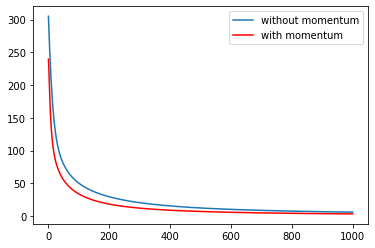

In [148]:
plt.plot(np.arange(1,iterations+1),losses,label='without momentum')
plt.plot(np.arange(1,iterations+1),losses_with_momentum,label='with momentum',color = 'red')
plt.legend()

### 3.6
Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

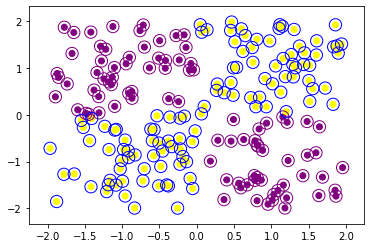

In [149]:
#credit to : https://github.com/daniuniuniuniu
#tried to use contourf to draw the decision boundary, but failed to get a reasonable result, because when I use ff_forward
#to do the prediction, I cannot get the correct parameters for the model, maybe because in my method, in 1 epoch,
#I have 200 points, therefore there are 200 parameter set, they get together get a good result, but not a single set
#is good to draw the contourf, and the same as their mean. 

#In her method, she draws the circle to represent area of certain prediction. Thus we can see the boundary of different
#types of predictions. It is not perfect, but makes sense, so I learned from her.

x1 = x.reshape([n,2])
yclass2=['blue']*n
for i in range(0,n):
    if yhats[i]<0.5:
        yclass2[i]= 'purple'
plt.scatter(x1[:,0],x1[:,1],color=col)
plt.scatter(x1[:,0],x1[:,1], color='', marker='o', edgecolors=yclass2, s=150)
plt.show()